## Load Data and split

In [29]:
import pandas as pd
df=pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")

In [30]:
#Split the data (training, validation and test dataset )
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['Exited'], random_state=42)
# Further split train into training (80%) and validation (20%)
train_set, validation_set = train_test_split(train_set, test_size=0.2, stratify=train_set['Exited'], random_state=42)

Target Variable Distribution:
          Train  Validation   Test
Exited                            
0       0.79625     0.79625  0.796
1       0.20375     0.20375  0.204


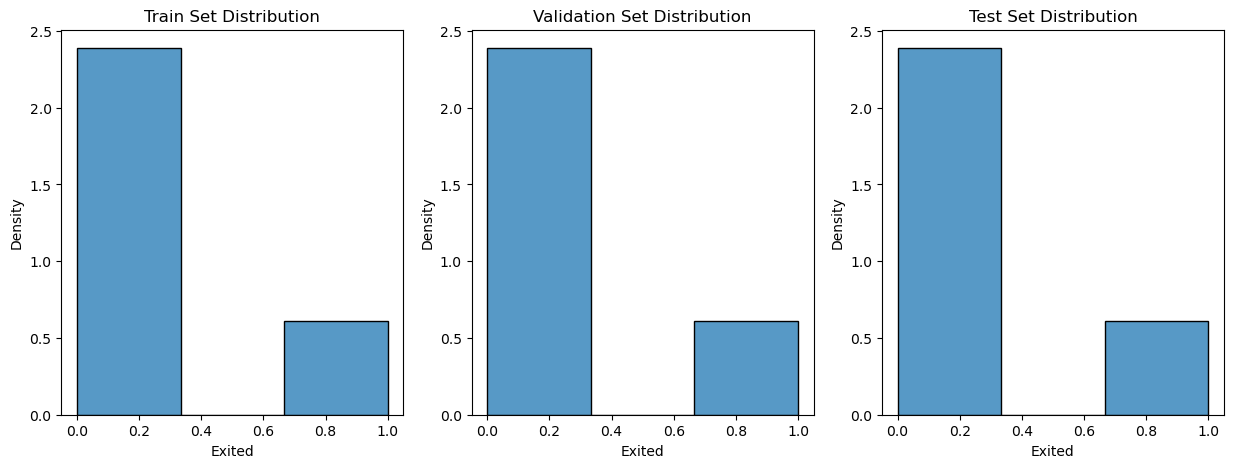

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to compare target variable distribution
def compare_distributions(train, validation, test, target_col='Exited'):
    # 1. Compare target variable distribution
    print("Target Variable Distribution:")
    train_dist = train[target_col].value_counts(normalize=True)
    val_dist = validation[target_col].value_counts(normalize=True)
    test_dist = test[target_col].value_counts(normalize=True)

    comparison_df = pd.DataFrame({'Train': train_dist, 'Validation': val_dist, 'Test': test_dist}).fillna(0)
    print(comparison_df)

    # 2. Plot distributions
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.histplot(train[target_col], bins=3, kde=False, ax=ax[0], stat="density")
    ax[0].set_title("Train Set Distribution")
    sns.histplot(validation[target_col], bins=3, kde=False, ax=ax[1], stat="density")
    ax[1].set_title("Validation Set Distribution")
    sns.histplot(test[target_col], bins=3, kde=False, ax=ax[2], stat="density")
    ax[2].set_title("Test Set Distribution")
    plt.show()
compare_distributions(train_set, validation_set, test_set, target_col='Exited')

## 1. Data exploration

In [19]:
#Make a copy of training data
trial=train_set
trial.head()

RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  \
471         472    15623202  Maslov          703    France    Male   37   
1870       1871    15762793   Jones          624     Spain    Male   33   
8383       8384    15665766   T'ang          493    France  Female   36   
3685       3686    15597885    Kerr          695     Spain  Female   39   
1194       1195    15794273    Hand          764    France  Female   24   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
471        1  149762.08              1          1               0   
1870       6       0.00              2          0               0   
8383       5  148667.81              2          1               0   
3685       5       0.00              2          0               0   
1194       7       0.00              2          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
471          20629.40       1         1                   3   DIAMOND   
1870         76551.70       0         0                   5      GOLD   
8383         56092.51       0         0                   4   DIAMOND   
3685        102763.69       0         0                   3   DIAMOND   
1194        186105.99       0         0                   1    SILVER   

      Point Earned  
471            371  
1870           566  
8383           921  
3685           320  
1194           410

In [ ]:
#No missing values in any of the variables
trial.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
#The dataset contains intergers variables and objects (Surname & Geography & Gender & Card Type). Binary (HasCrCard, IsActiveMember, Complain)
trial.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [24]:
#Drop variables without use
trial=trial.drop(columns=['RowNumber', 'CustomerId' ,'Surname'])

### Target Variable Analysis

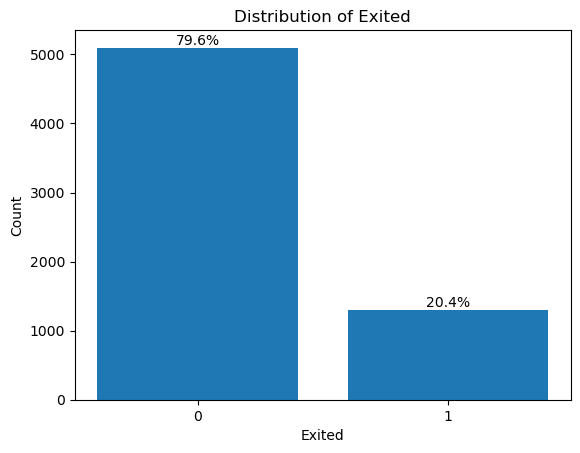

In [ ]:
#Target Variable
counts = trial['Exited'].value_counts()
percentages = trial['Exited'].value_counts(normalize=True) * 100
fig, ax = plt.subplots()
bars = ax.bar(counts.index.astype(str), counts.values)
for bar, pct in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')
ax.set_xlabel('Exited')
ax.set_ylabel('Count')
ax.set_title('Distribution of Exited')
plt.show()


### Categorical Variables analysis

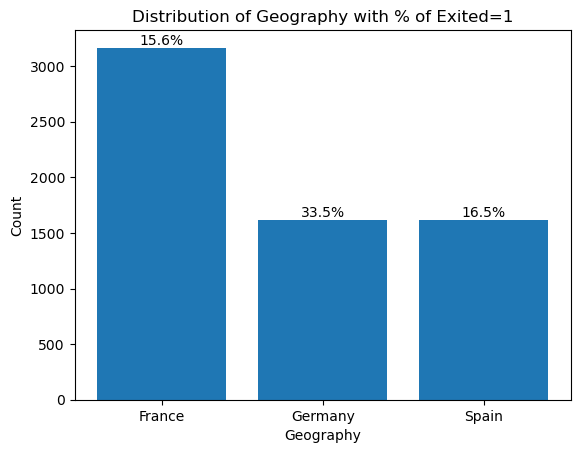

In [ ]:
#Geography: the average attrition in germany is higher than the rest but there is a imbalance data from France compare to the others
geo_counts = trial['Geography'].value_counts()
geo_pct_exited = trial.groupby('Geography')['Exited'].mean() * 100

fig, ax = plt.subplots()
bars = ax.bar(geo_counts.index, geo_counts.values)
for category, bar in zip(geo_counts.index, bars):
    pct = geo_pct_exited.loc[category]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')
ax.set_xlabel('Geography')
ax.set_ylabel('Count')
ax.set_title('Distribution of Geography with % of Exited=1')
plt.show()

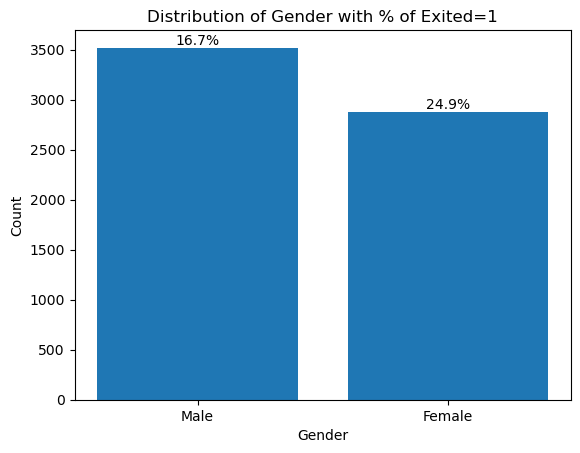

In [ ]:
#Gender: The average attrition is higher in Female gender, indicating the importance of the variable. The imbalacen in genre is not clear enough
geo_counts = trial['Gender'].value_counts()
geo_pct_exited = trial.groupby('Gender')['Exited'].mean() * 100

fig, ax = plt.subplots()
bars = ax.bar(geo_counts.index, geo_counts.values)
for category, bar in zip(geo_counts.index, bars):
    pct = geo_pct_exited.loc[category]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender with % of Exited=1')
plt.show()

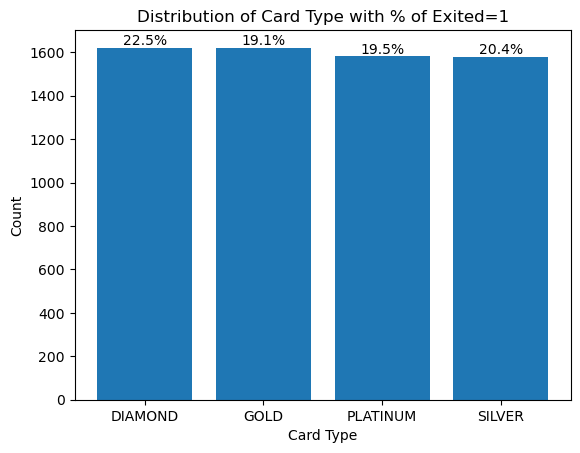

In [ ]:
#Card Type: The data is balance for this feature, the average attrition is the same
geo_counts = trial['Card Type'].value_counts()
geo_pct_exited = trial.groupby('Card Type')['Exited'].mean() * 100

fig, ax = plt.subplots()
bars = ax.bar(geo_counts.index, geo_counts.values)
for category, bar in zip(geo_counts.index, bars):
    pct = geo_pct_exited.loc[category]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')
ax.set_xlabel('Card Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Card Type with % of Exited=1')
plt.show()

### Binary Variables analysis

Exited             0          1  Total Count
HasCrCard                                   
0          78.841042  21.158958         1881
1          79.951317  20.048683         4519


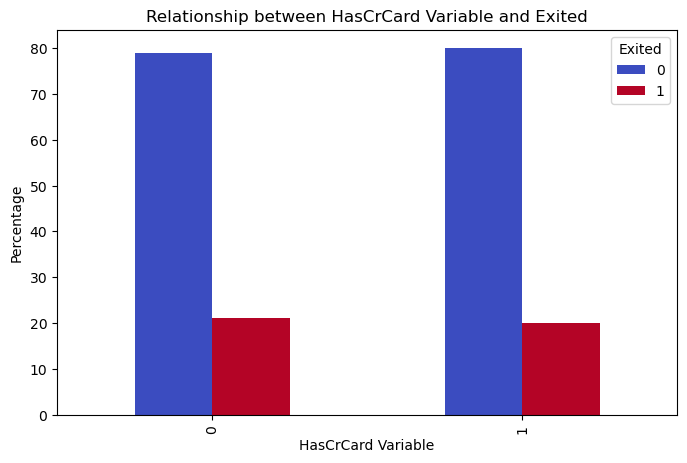

In [ ]:
#HasCrCard: Is imbalance the amount of people who dont have a credit card, but the average attrition is similar for both categories
cross_tab = pd.crosstab(trial['HasCrCard'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['HasCrCard'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['HasCrCard'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('HasCrCard Variable')
plt.ylabel('Percentage')
plt.title('Relationship between HasCrCard Variable and Exited')
plt.legend(title="Exited")
plt.show()

Exited                  0          1  Total Count
IsActiveMember                                   
0               73.507583  26.492417         3099
1               85.368070  14.631930         3301


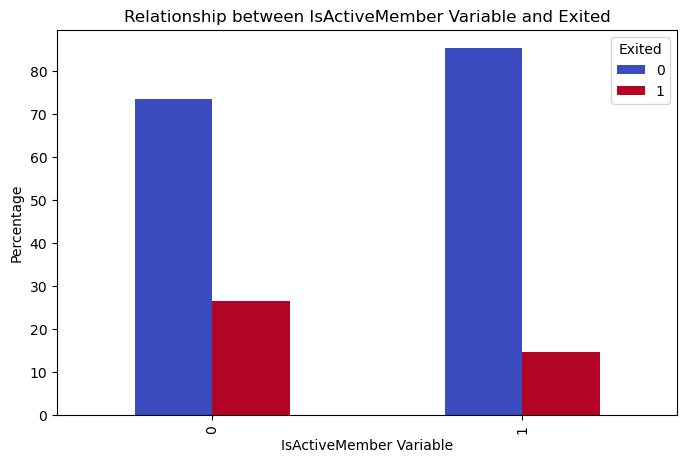

In [ ]:
#IsActiveMember: The data is balance for the category. The average attrition is higher for not active members
cross_tab = pd.crosstab(trial['IsActiveMember'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['IsActiveMember'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['IsActiveMember'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('IsActiveMember Variable')
plt.ylabel('Percentage')
plt.title('Relationship between IsActiveMember Variable and Exited')
plt.legend(title="Exited")
plt.show()

Exited            0          1  Total Count
Complain                                   
0         99.960715   0.039285         5091
1          0.534759  99.465241         1309


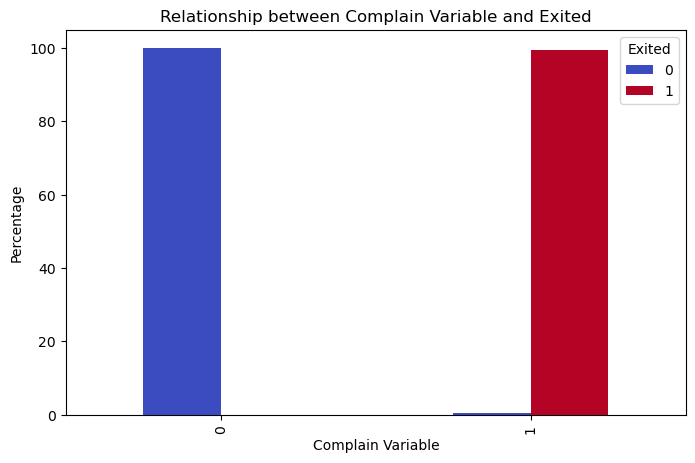

In [ ]:
#Complain: Low number of people who complain, however excibit a high attrition. While if there is not complain, the attrition is low.
cross_tab = pd.crosstab(trial['Complain'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['Complain'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['Complain'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('Complain Variable')
plt.ylabel('Percentage')
plt.title('Relationship between Complain Variable and Exited')
plt.legend(title="Exited")
plt.show()

### Numerical Variables analysis

In [47]:
numerical_trial = trial.select_dtypes(include=['number']).drop(['IsActiveMember','Exited','Complain','HasCrCard'], axis=1)

In [ ]:
#Age: The standard devition is high due to extreme values
#Balance: There is high volatility influence by high values in the right extreme
#EstimatedSalary: The minimum values are not significant, can be for a bad estimation of salary. The high ends looks more well distributed than the left side
numerical_trial.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  6400.000000  6400.000000  6400.000000    6400.000000    6400.000000   
mean    650.849687    38.920469     4.981406   76596.858272       1.528281   
std      96.430456    10.532935     2.883550   62308.596746       0.579765   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     2.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97267.100000       1.000000   
75%     718.000000    44.000000     7.000000  127809.812500       2.000000   
max     850.000000    92.000000    10.000000  222267.630000       4.000000   

       EstimatedSalary  Satisfaction Score  Point Earned  
count      6400.000000         6400.000000   6400.000000  
mean      99318.781064            3.001562    603.738281  
std       57550.332628            1.408233    225.622531  
min          11.580000            1.000000    119.000000  
25%       49802.107500            2.000000    407.000000  
50%       98815.585000            3.000000    600.000000  
75%      148519.482500            4.000000    797.000000  
max      199992.480000            5.000000   1000.000000

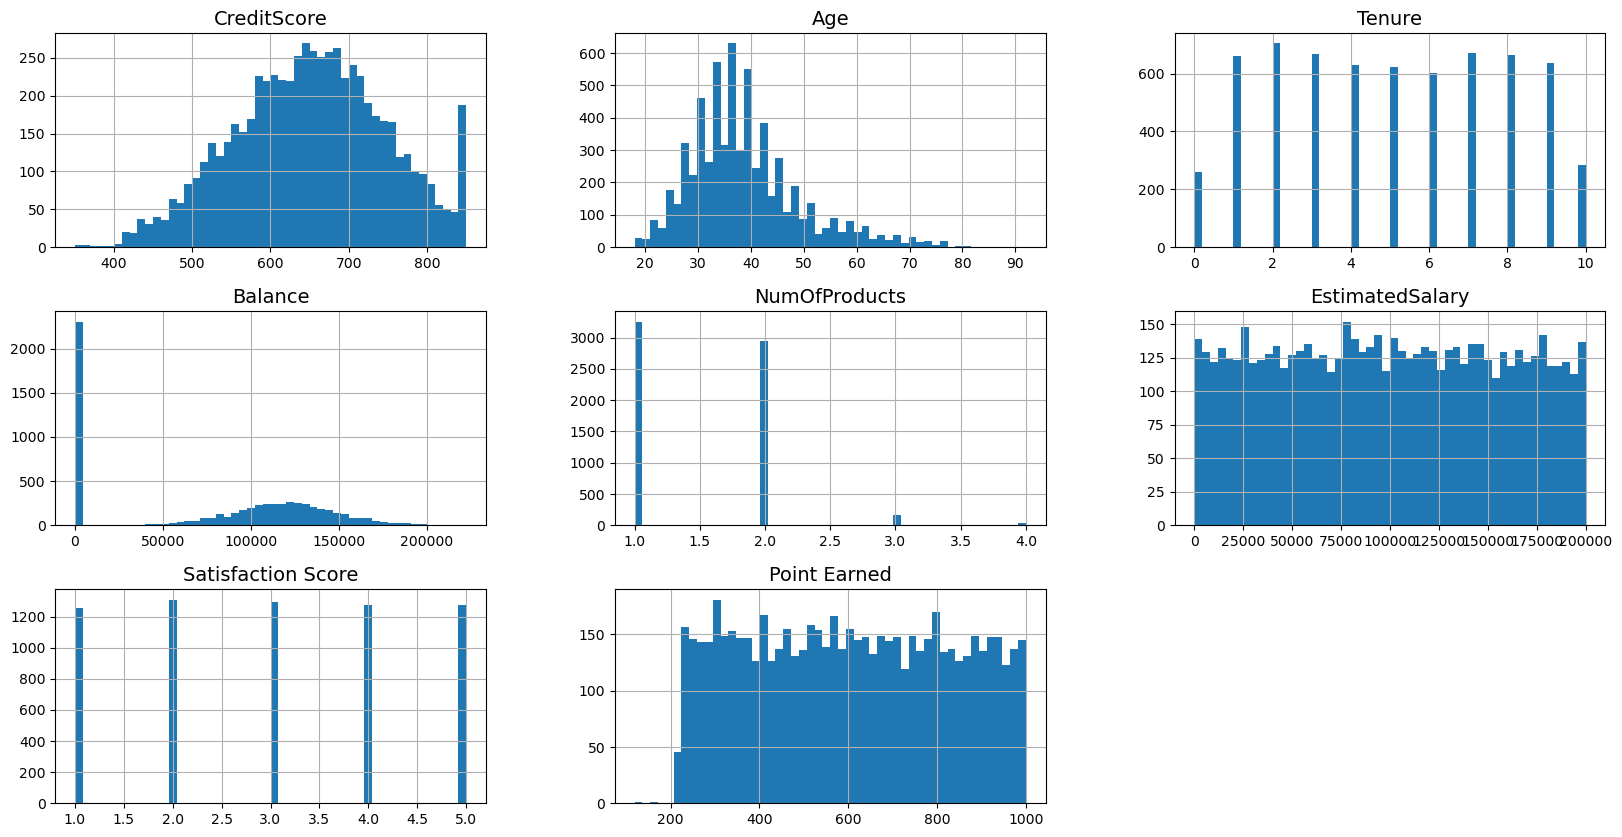

In [ ]:
#Age: Distribution skew to the right
#Balance: Accumulate values in cero, and after that have another normal distribution. Possible to differenciate between having or not any amount in the balance
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

numerical_trial.hist(bins=50, figsize=(20, 10))
plt.show()

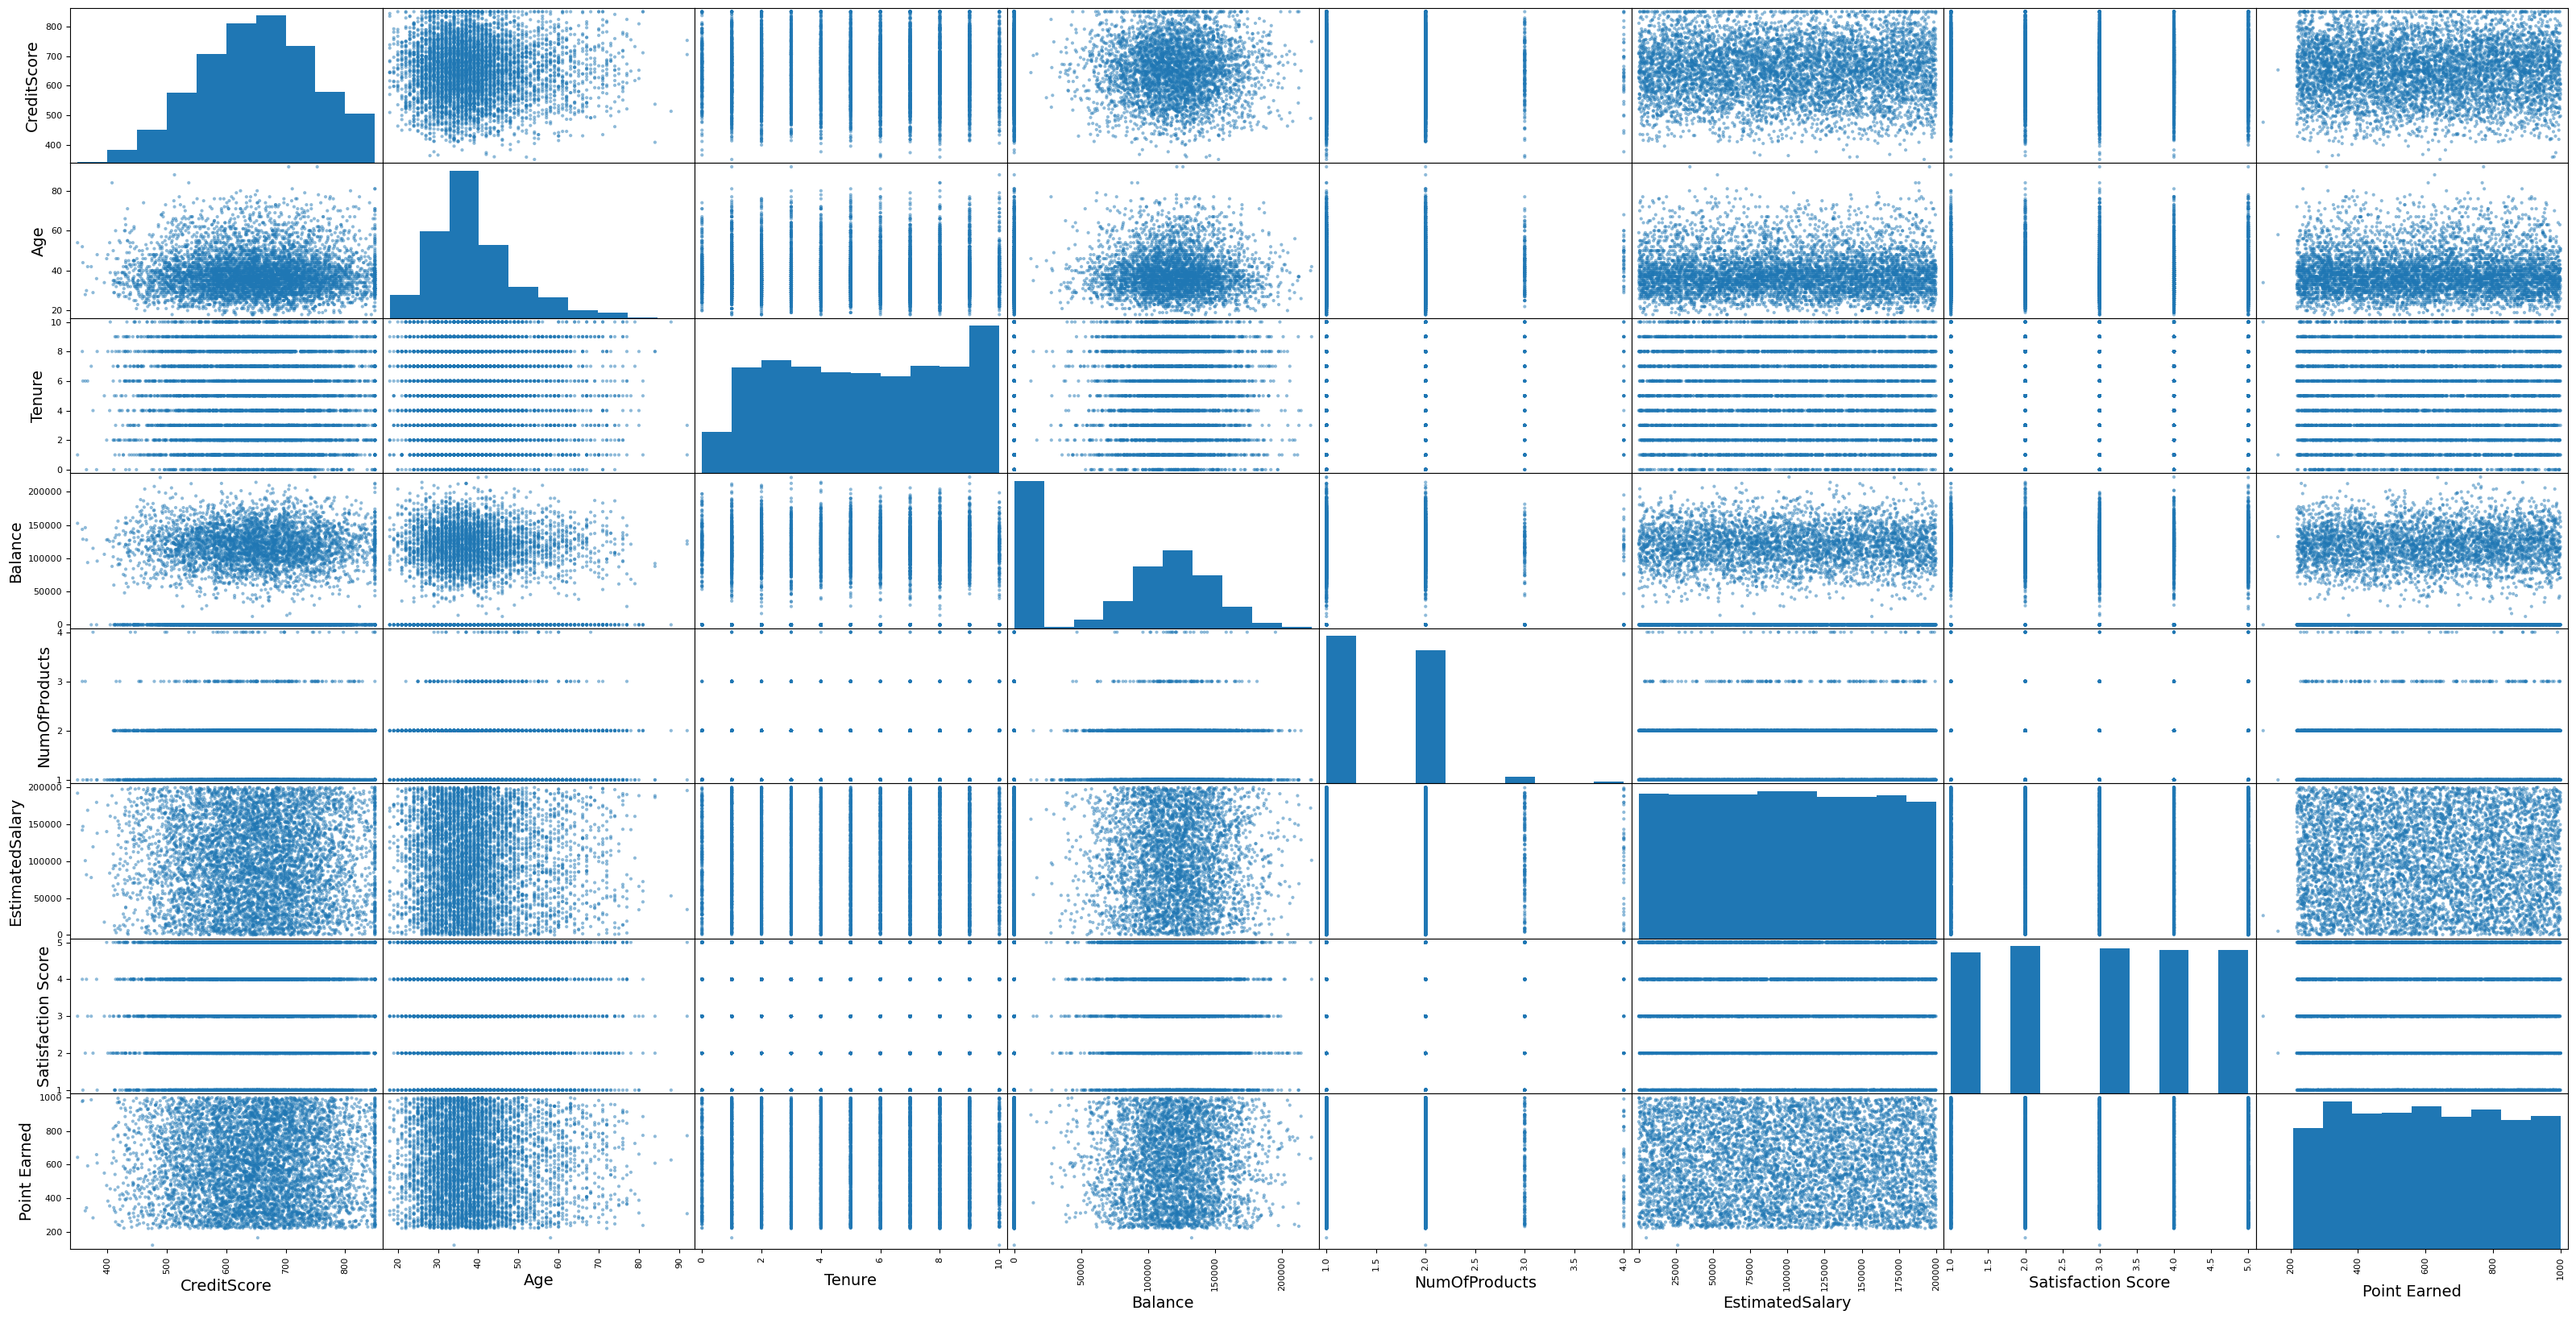

In [ ]:
#There is not a clear relationship between variables that may indicate any time of interaction
from pandas.plotting import scatter_matrix
scatter_matrix(numerical_trial, figsize=(40, 20))
plt.show()

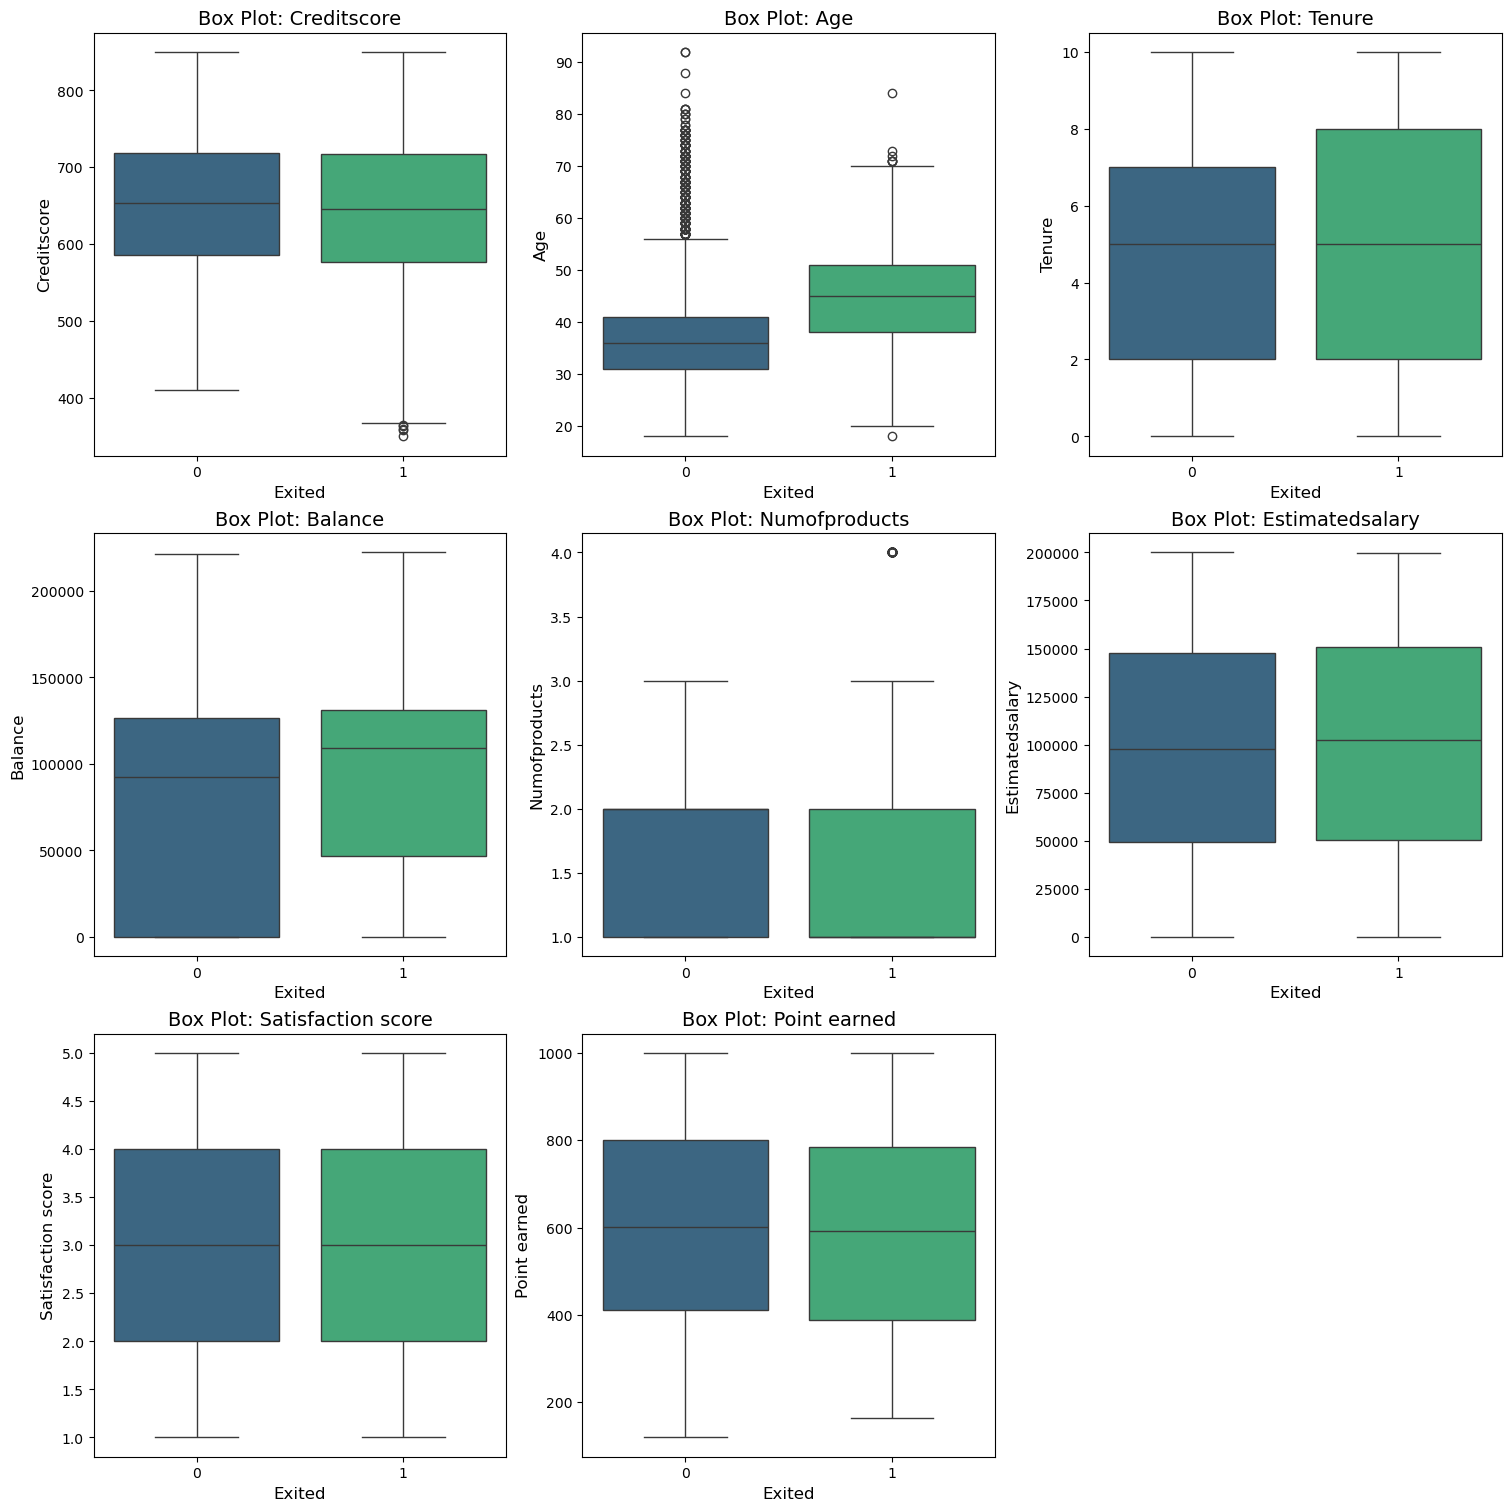

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numeric columns excluding the binary target ('popular')
num_columns = [col for col in numerical_trial]

# Define the number of plots per row
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure and subplots with constrained layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create box plots for each numerical variable
for idx, column in enumerate(numerical_trial):
    ax = axes[idx]  # Select the current subplot

    # Create a box plot grouped by the 'popular' column
    sns.boxplot(data=trial, x='Exited', y=column, hue='Exited', ax=ax, palette='viridis')
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    
    # Add titles and labels
    ax.set_title(f'Box Plot: {column.capitalize()}', fontsize=14)
    ax.set_xlabel('Exited', fontsize=12)
    ax.set_ylabel(column.capitalize(), fontsize=12)

# Remove any unused subplots
for idx in range(len(num_columns), len(axes)):
    fig.delaxes(axes[idx])

# Display the plots
plt.show()



In [141]:
#Estimated Salary
import numpy as np
trial['salary_group'] = np.where(trial['EstimatedSalary'] < 1000, 'Below 1000', 'Above 1000')
cross_tab = pd.crosstab(trial['salary_group'], trial['Exited'], normalize='index')*100
cross_tab['Total Count'] = trial['salary_group'].value_counts()
print(cross_tab)
trial=trial.drop(columns=['salary_group'])
trial = trial[trial['EstimatedSalary'] >= 1000] #Eliminate this noise

Exited                0          1  Total Count
salary_group                                   
Above 1000    79.676202  20.323798         6362
Below 1000    71.052632  28.947368           38


### Featuring engineering variables

Exited               0          1  Total Count
has_balance                                   
0            86.425142  13.574858         2291
1            75.878163  24.121837         4071


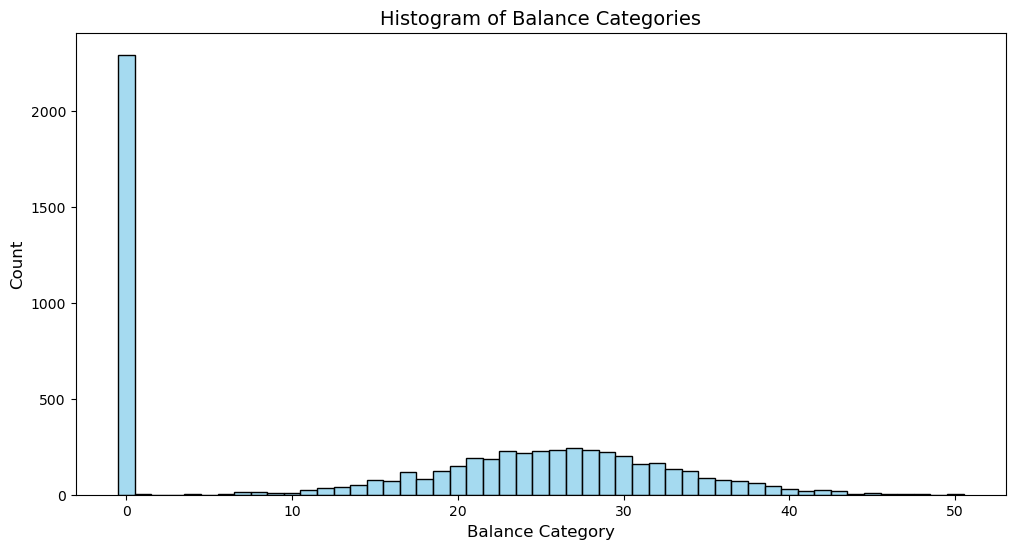

In [146]:
### Balance ###: Separate having or not balance  or make categories according to the balance
#Binary variable( Has balance): people with no balance tend to have a lower attrition 
trial['has_balance'] = (trial['Balance'] > 0).astype(int) 
cross_tab = pd.crosstab(trial['has_balance'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['has_balance'].value_counts()
print(cross_tab)

#Create a new categorical variable for balance
balance_cat = pd.Series(np.nan, index=trial.index)
balance_cat[trial['Balance'] == 0] = 0
nonzero_mask = trial['Balance'] != 0
bins = pd.cut(trial.loc[nonzero_mask, 'Balance'],bins=50,labels=range(1, 51))
balance_cat.loc[nonzero_mask] = pd.to_numeric(bins)
trial['balance_cat'] = balance_cat.astype(int)

    #Graph
plt.figure(figsize=(12, 6))
sns.histplot(trial['balance_cat'], bins=51, discrete=True, color='skyblue')
plt.title('Histogram of Balance Categories', fontsize=14)
plt.xlabel('Balance Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


C:\Users\gpnc_\AppData\Local\Temp\ipykernel_11704\2743832681.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=trial, x='Exited', y=column, ax=axes[idx], palette='viridis')
C:\Users\gpnc_\AppData\Local\Temp\ipykernel_11704\2743832681.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=trial, x='Exited', y=column, ax=axes[idx], palette='viridis')
C:\Users\gpnc_\AppData\Local\Temp\ipykernel_11704\2743832681.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=trial, x='Exited', y=column, ax=axes[idx], palette='viridis')


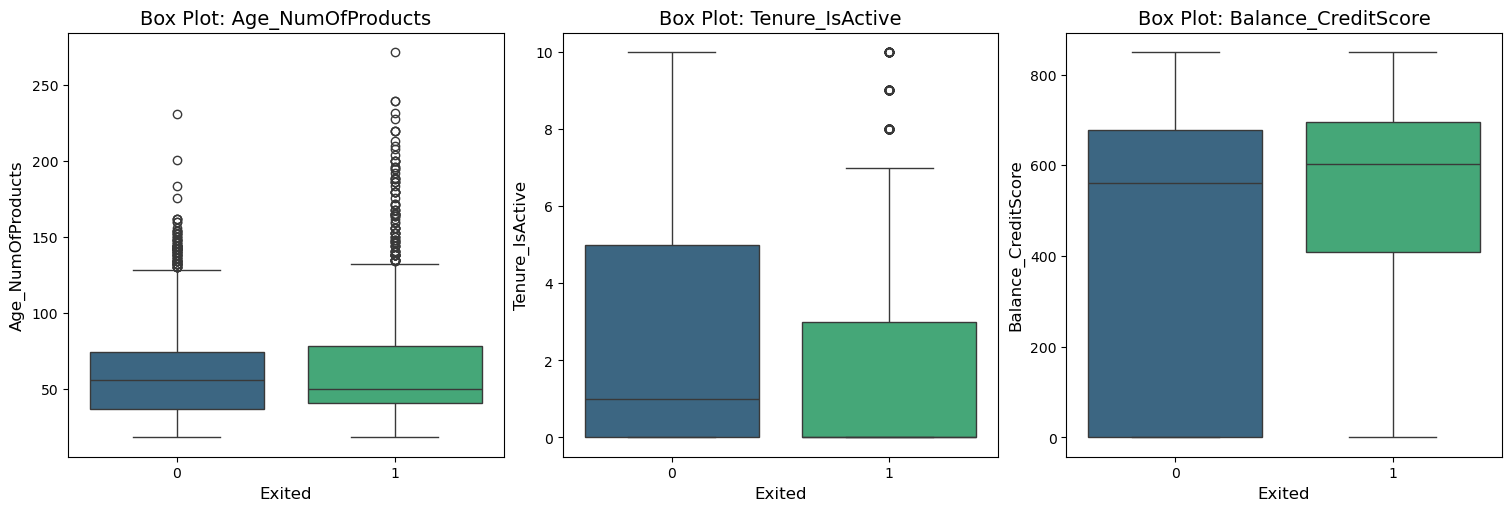

In [158]:
### Interactions
trial['Tenure_IsActive'] = trial['Tenure'] * trial['IsActiveMember'] #A 10-year inactive customer is more likely to leave than a 2-year active customer.
trial['Balance_CreditScore'] = trial['has_balance'] * trial['CreditScore'] #A customer with a positive balance and good credit might leave because more options available
trial['Age_NumOfProducts'] = trial['Age'] * trial['NumOfProducts'] #A 25-year-old with 1 product is more likely to churn than a 50-year-old with 3 products.

interaction_vars = ['Age_NumOfProducts', 'Tenure_IsActive', 'Balance_CreditScore']

# Define number of plots per row
n_cols = 3
n_rows = 1  # Since we have only 3 interactions

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5), constrained_layout=True)
axes = axes.flatten()

for idx, column in enumerate(interaction_vars):
    sns.boxplot(data=trial, x='Exited', y=column, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'Box Plot: {column}', fontsize=14)
    axes[idx].set_xlabel('Exited', fontsize=12)
    axes[idx].set_ylabel(column, fontsize=12)

plt.show()

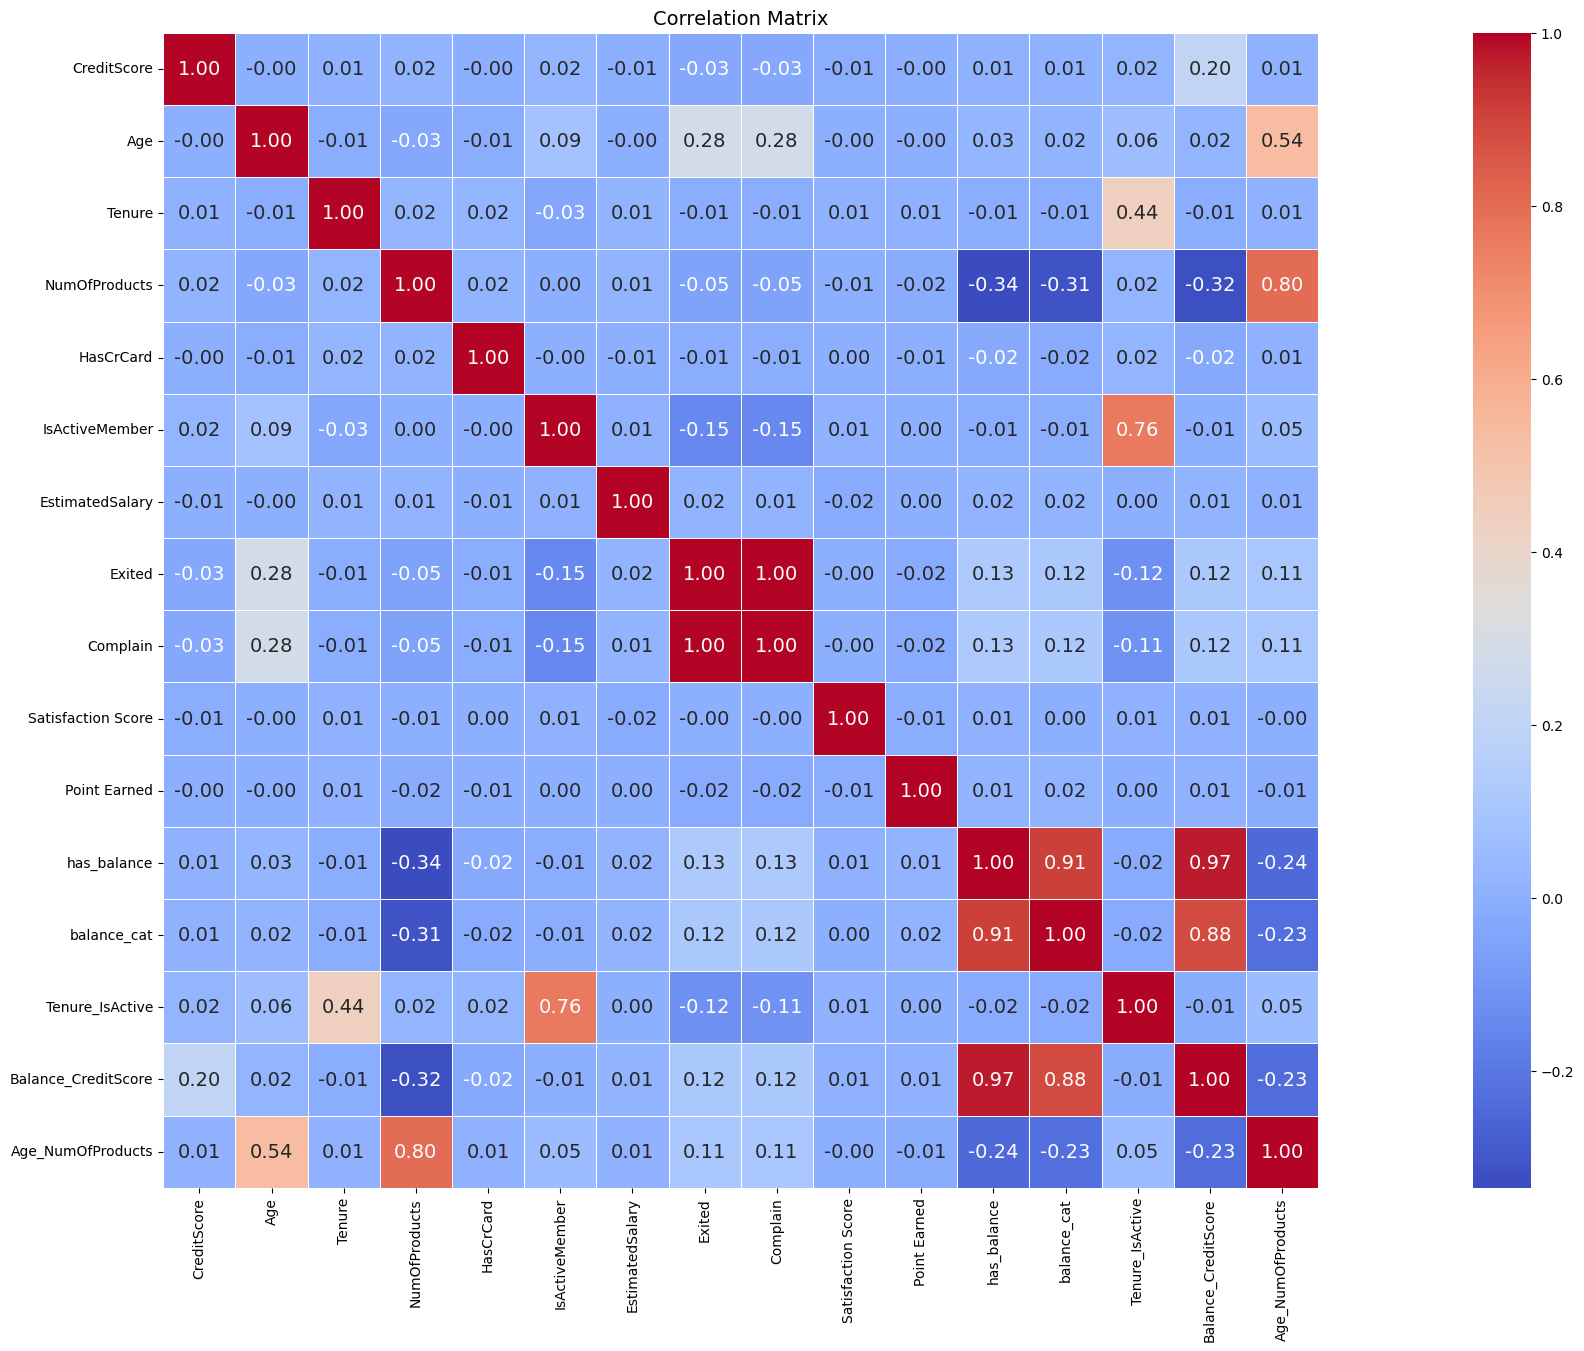

In [ ]:
#Correlation matrix
trial=trial.drop(columns=['Balance'])
    #Complain and Exited are perfectly correlated should be drop
    #Balance_CreditScore is highly corralated with another, therefore this new variable wont be used
    #Age_NumOfProducts is highly corralted, then should be drop
df_num = trial.select_dtypes(include=['number'])
correlation_matrix = df_num.corr()
plt.figure(figsize=(40, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.4)
plt.title('Correlation Matrix')
plt.show()


## 2. Data preparation

In [31]:
#train_set, validation_set, test_set
train_set_2=train_set
#1. Create a new variable
train_set_2['has_balance'] = (train_set_2['Balance'] > 0).astype(int) 
#2. Drop irrelevant columns
train_set_2=train_set_2.drop(columns=['RowNumber', 'CustomerId' ,'Surname','Complain','Balance'])
#3. Create a new variable
train_set_2['Tenure_IsActive'] = train_set_2['Tenure'] * train_set_2['IsActiveMember']
#4. One-Hot encoding of categorical variables (Geography, gender)
train_set_2 = pd.get_dummies(train_set_2, columns=['Geography'], drop_first=True)
train_set_2= pd.get_dummies(train_set_2, columns=['Gender'], drop_first=False)
train_set_2=train_set_2.drop(columns=['Gender_Male'])
#5. Encoding (Car Type)
mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}
train_set_2['Card_Type_encoded'] = train_set_2['Card Type'].map(mapping)
train_set_2 = train_set_2.drop(columns=['Card Type'])

Threshold for 5% most anomalous points: -1.650581340578933e-17
      anomaly_score  outlier_probability  is_outlier
471               1            -0.090728           0
1870              1            -0.062490           0
8383              1            -0.077907           0
3685              1            -0.051685           0
1194              1            -0.026749           0


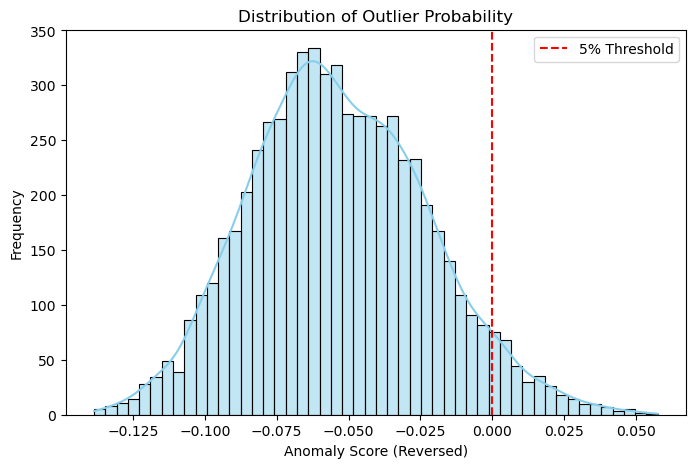

In [32]:
import numpy as np
#6. Delete the noise values from the training
train_set_2 = train_set_2[train_set_2['EstimatedSalary'] >= 1000]
#7. Outliers detection : No need to delete outliers
from sklearn.ensemble import IsolationForest
features = train_set_2.drop(columns=['Exited'])
num_columns = features.select_dtypes(include=['number']).columns
X = features[num_columns]
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X)
scores = iso_forest.decision_function(X)
threshold_5_percentile = np.percentile(scores, 5)
train_set_2['anomaly_score'] = iso_forest.predict(X)
train_set_2['outlier_probability'] = -scores  # Reverse scores so that higher = more anomalous
train_set_2['is_outlier'] = (scores <= threshold_5_percentile).astype(int)
    # Display threshold and sample results
print(f"Threshold for 5% most anomalous points: {threshold_5_percentile}")
print(train_set_2[['anomaly_score', 'outlier_probability', 'is_outlier']].head())
    #Visualization
plt.figure(figsize=(8, 5))
sns.histplot(train_set_2['outlier_probability'], bins=50, kde=True, color='skyblue')
plt.axvline(x=-threshold_5_percentile, color='red', linestyle='--', label="5% Threshold")
plt.title("Distribution of Outlier Probability")
plt.xlabel("Anomaly Score (Reversed)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
train_set_2 = train_set_2.drop(columns=['anomaly_score', 'outlier_probability', 'is_outlier'])

#8. Split the data target (Exited) vs predicting variables 
y_train = train_set_2['Exited']
x_train = train_set_2.drop(columns=['Exited'])

In [51]:
#9. Dealing with imbalanced data
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('under', RandomUnderSampler(sampling_strategy=1.0, random_state=42))
])
x_res, y_res = pipeline.fit_resample(x_train, y_train)

## 3. Pipeline

In [34]:
#Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Define a custom transformer for churn preprocessing
class ChurnPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Mapping for Card Type encoding
        self.mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}
    
    def fit(self, X, y=None):
        # No fitting needed; simply return self
        return self
    
    def transform(self, X):
        # Work on a copy of the DataFrame
        df = X.copy()
        
        # 1. Create a new variable 'has_balance'
        df['has_balance'] = (df['Balance'] > 0).astype(int)
        
        # 2. Drop irrelevant columns
        df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Complain', 'Balance'])
        
        # 3. Create a new variable 'Tenure_IsActive'
        df['Tenure_IsActive'] = df['Tenure'] * df['IsActiveMember']
        
        # 4. One-Hot Encoding of categorical variables
        #    a. Geography: drop the first dummy (avoiding multicollinearity)
        df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
        #    b. Gender: perform one-hot encoding, then drop 'Gender_Male' to keep only Female indicator
        df = pd.get_dummies(df, columns=['Gender'], drop_first=False)
        if 'Gender_Male' in df.columns:
            df = df.drop(columns=['Gender_Male'])
        
        # 5. Encoding for Card Type with the specified mapping
        df['Card_Type_encoded'] = df['Card Type'].map(self.mapping)
        df = df.drop(columns=['Card Type'])
        
        return df

# Create the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('churn_preprocessor', ChurnPreprocessor())
])


## 4. Modelling

In [52]:
#Training data ready:
training_set = preprocessing_pipeline.fit_transform(train_set)
training_set= training_set[training_set['EstimatedSalary'] >= 1000]
y_train = training_set['Exited']
x_train = training_set.drop(columns=['Exited'])
x_res, y_res = pipeline.fit_resample(x_train, y_train)

In [53]:
#Validation set ready:
validation_set_process=preprocessing_pipeline.fit_transform(validation_set)
y_val = validation_set_process['Exited']
x_val = validation_set_process.drop(columns=['Exited'])
#Test Set ready:
test_set_process=preprocessing_pipeline.fit_transform(test_set)
y_test = test_set_process['Exited']
x_test = test_set_process.drop(columns=['Exited'])

### 1. Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import classification_report

X_combined = np.concatenate([x_res, x_val])
y_combined = np.concatenate([y_res, y_val])

test_fold = np.concatenate([np.full(len(x_res), -1), np.zeros(len(x_val))])
ps = PredefinedSplit(test_fold)

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=ps,            # Use the predefined train/validation split
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_combined, y_combined)

print("Best parameters found:", grid_search.best_params_)
print("Best validation recall: {:.4f}".format(grid_search.best_score_))
best_rf = grid_search.best_estimator_
#y_pred = best_rf.predict(x_val)
#print(classification_report(y_val, y_pred))


Fitting 1 folds for each of 48 candidates, totalling 48 fits
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best validation recall: 0.6840


### 2. Xboosting model

In [58]:
from xgboost import XGBClassifier

X_combined = np.concatenate([x_res, x_val])
y_combined = np.concatenate([y_res, y_val])

test_fold = np.concatenate([np.full(len(x_res), -1), np.zeros(len(x_val))])
ps = PredefinedSplit(test_fold)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 10],  # XGBoost requires integer depths; adjust as needed
    'learning_rate': [0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=ps,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_combined, y_combined)

print("Best parameters found:", grid_search.best_params_)
print("Best validation accuracy: {:.4f}".format(grid_search.best_score_))
best_xgb = grid_search.best_estimator_

#y_pred = best_xgb.predict(x_val)
#print(classification_report(y_val, y_pred))


Fitting 1 folds for each of 96 candidates, totalling 96 fits
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best validation accuracy: 0.6902


c:\Users\gpnc_\anaconda4\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 3. Logistic model

In [65]:
from sklearn.linear_model import LogisticRegression

X_combined = np.concatenate([x_res, x_val])
y_combined = np.concatenate([y_res, y_val])
test_fold = np.concatenate([np.full(len(x_res), -1), np.zeros(len(x_val))])
ps = PredefinedSplit(test_fold)

# Define a parameter grid for Logistic Regression with ridge (L2) regularization
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Initialize the Logistic Regression model with L2 penalty (ridge regularization)
log_reg = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=ps,
    scoring='recall',  # Optimize for recall, especially for class 1
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_combined, y_combined)

print("Best parameters found:", grid_search.best_params_)
print("Best validation recall: {:.4f}".format(grid_search.best_score_))

best_lr = grid_search.best_estimator_

Fitting 1 folds for each of 8 candidates, totalling 8 fits
Best parameters found: {'C': 0.001, 'solver': 'liblinear'}
Best validation recall: 0.6810


### Stacking model

In [ ]:
best_rf = grid_search.best_estimator_
best_xgb = grid_search.best_estimator_
best_lr = grid_search.best_estimator_

In [66]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report

# Create a list of base estimators for the stacking model.
estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lr', best_lr)
]

# Initialize the StackingClassifier.
# The final_estimator (meta-model) can be any classifier. Here, LogisticRegression is used.
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=5,          # Cross-validation for meta-model training
    n_jobs=-1,
    passthrough=False  # Set to True if you want to include original features alongside predictions from base models
)

# Fit the stacking model on your training data.
stack_model.fit(x_res, y_res)

# Predict on the validation set.
y_pred = stack_model.predict(x_val)

# Output the classification report.
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1274
           1       0.52      0.68      0.59       326

    accuracy                           0.81      1600
   macro avg       0.72      0.76      0.73      1600
weighted avg       0.83      0.81      0.82      1600



### Final Data Test

In [67]:
y_final_pred = stack_model.predict(x_test)
print(classification_report(y_test, y_final_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1592
           1       0.53      0.72      0.61       408

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000

